# Trading Agent Simulation
This notebook simulates a trading agent that manages the stock and pricing of smartphones.

## Import Libraries
We need to import the necessary libraries for plotting and numerical operations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Define the TradingAgent Class
This class will manage the trading operations, including stock levels, pricing, and order decisions.

In [4]:
class TradingAgent:
    def __init__(self, avg_price, critical_stock=10, discount_threshold=0.2, order_quantity=10):
        # Initializing the agent with given parameters
        self.avg_price = avg_price  # Average price of smartphone
        self.critical_stock = critical_stock  # Critical stock level
        self.discount_threshold = discount_threshold  # Discount threshold (20%)
        self.order_quantity = order_quantity  # Default order quantity if stock is low
        self.stock = 50  # Initial stock
        self.price = avg_price  # Initial price
        self.orders = []  # List to track orders over time
        self.prices = []  # List to track prices over time
        self.stocks = []  # List to track stock levels over time
        self.decision_log = []  # Track decision history for analysis

    def update_avg_price(self, new_price):
        """Update the average price dynamically."""
        self.avg_price = (self.avg_price + new_price) / 2  # Simple moving average

    def decide_order(self):
        # Decision logic based on price and stock level
        if self.price <= self.avg_price * (1 - self.discount_threshold) and self.stock >= self.critical_stock:
            to_buy = max(15, self.stock // 2)  # Order a dynamic quantity (min 15, or half stock)
            self.orders.append(to_buy)
            self.stock += to_buy
            self.update_avg_price(self.price)  # Update average price with the latest price
            self.decision_log.append(('Price Discount', self.price, self.stock, to_buy))
        elif self.stock < self.critical_stock:
            to_buy = self.order_quantity
            self.orders.append(to_buy)
            self.stock += to_buy
            self.decision_log.append(('Critical Stock', self.price, self.stock, to_buy))
        else:
            self.orders.append(0)
            self.decision_log.append(('No Order', self.price, self.stock, 0))

    def update_price(self, new_price):
        """Update the current price."""
        self.price = new_price

    def run_simulation(self, price_changes, stock_changes):
        """Simulate the agent's decision over time."""
        for i in range(len(price_changes)):
            self.update_price(price_changes[i])
            self.stock += stock_changes[i]
            self.decide_order()  # Make decision based on the current price and stock
            # Track the data for plotting
            self.prices.append(self.price)
            self.stocks.append(self.stock)

        # Plot the results after simulation
        self.plot_results()

    def plot_results(self):
        """Plot stock levels and orders over time."""
        fig, ax1 = plt.subplots()

        ax1.set_xlabel('Time Step')
        ax1.set_ylabel('Stock Level', color='tab:blue')
        ax1.plot(self.stocks, color='tab:blue', label="Stock Level")
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        ax2 = ax1.twinx()
        ax2.set_ylabel('Price', color='tab:red')
        ax2.plot(self.prices, color='tab:red', label="Price", linestyle="--")
        ax2.tick_params(axis='y', labelcolor='tab:red')

        fig, ax3 = plt.subplots()
        ax3.set_xlabel('Time Step')
        ax3.set_ylabel('Orders Placed')
        ax3.plot(self.orders, label="Orders Placed", color='green')

        plt.tight_layout()
        plt.show()

## Test the TradingAgent Class
We will test the `TradingAgent` class with some simulated data for price changes and stock changes.

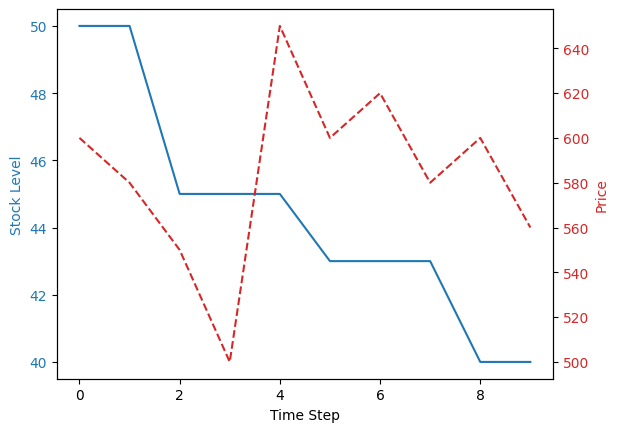

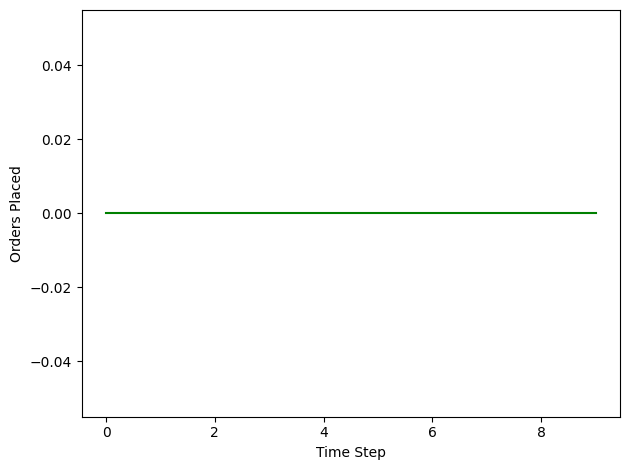

In [5]:
# Test the TradingAgent class with simulated data
if __name__ == "__main__":
    avg_price = 600  # Average price of smartphone
    price_changes = [600, 580, 550, 500, 650, 600, 620, 580, 600, 560]  # Simulated price data
    stock_changes = [0, 0, -5, 0, 0, -2, 0, 0, -3, 0]  # Simulated stock changes

    agent = TradingAgent(avg_price)
    agent.run_simulation(price_changes, stock_changes)